UNDESTANDING THE PROBLEM STATEMENT AND BUSINESS CASE

![alt text](https://drive.google.com/uc?id=1djxup79_KiGtKFiH7AgSD0Bj-2D90TBg)

IMPORTING LIBRARIES/DATASETS AND PERFORMING EXPLORATORY DATA ANALYSIS

In [ ]:
# Importing key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Installing nltk
# NLTK: Natural Language tool kit
!pip install nltk

In [ ]:
# installing gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
!pip install gensim

In [ ]:
# Loading the stock news data
stock_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Part 3. AI and ML in Finance/stock_sentiment.csv")

In [ ]:
# Viewing the dataset 
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [ ]:
# Viewing the dataset 
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


***PERFORMING DATA CLEANING:***

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
Test = '$I love AI and Machine Learning!!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['I',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 'A',
 'I',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'L',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g']

In [ ]:
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love AI and Machine Learning'

In [ ]:
Test = 'I am making a project on ML in Finance...... and this is fun!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['I',
 ' ',
 'a',
 'm',
 ' ',
 'm',
 'a',
 'k',
 'i',
 'n',
 'g',
 ' ',
 'a',
 ' ',
 'p',
 'r',
 'o',
 'j',
 'e',
 'c',
 't',
 ' ',
 'o',
 'n',
 ' ',
 'M',
 'L',
 ' ',
 'i',
 'n',
 ' ',
 'F',
 'i',
 'n',
 'a',
 'n',
 'c',
 'e',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'f',
 'u',
 'n']

In [ ]:
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I am making a project on ML in Finance and this is fun'

In [ ]:
def remove_punc(message):
  Test_punc_removed = [char for char in message if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  return Test_punc_removed_join



In [ ]:
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [ ]:
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punc)

In [ ]:
stock_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [ ]:
# Dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Text                      5791 non-null   object
 1   Sentiment                 5791 non-null   int64 
 2   Text Without Punctuation  5791 non-null   object
dtypes: int64(1), object(2)
memory usage: 135.9+ KB


In [ ]:
# Checking for null values
stock_df.isnull().sum()

Text                        0
Sentiment                   0
Text Without Punctuation    0
dtype: int64



- **Finding unique elements in 'Sentiment' column.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



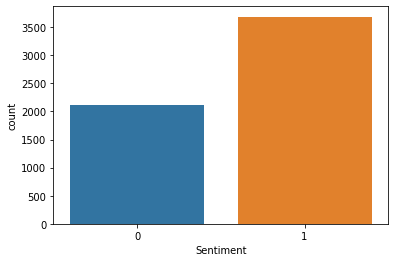

In [ ]:
sns.countplot(stock_df['Sentiment'])

In [ ]:
stock_df['Sentiment'].nunique()

2

PERFORMING DATA CLEANING (REMOVING PUNCTUATIONS FROM TEXT)



In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
Test = "$ I love AI & Machine Learning!!!"
Test_punc_removed = [char for char in Test if char not in string.punctuation ] 
Test_punc_removed

[' ',
 'I',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 'A',
 'I',
 ' ',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'L',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g']

In [ ]:
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

' I love AI  Machine Learning'

In [ ]:

def remove_punc(message):
  Test_punc_removed = [ char for char in message if char not in string.punctuation ]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  return Test_punc_removed_join

 PERFORMING DATA CLEANING (REMOVE STOPWORDS)

In [ ]:
# Downloading stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Obtaining additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [ ]:
# Removing stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
#Applying pre-processing to the text column
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)

In [ ]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


In [ ]:
stock_df['Text'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [ ]:
stock_df['Text Without Punc & Stopwords'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [ ]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


 PLOTTING WORDCLOUD

In [ ]:
stock_df['Text Without Punc & Stopwords Joined'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

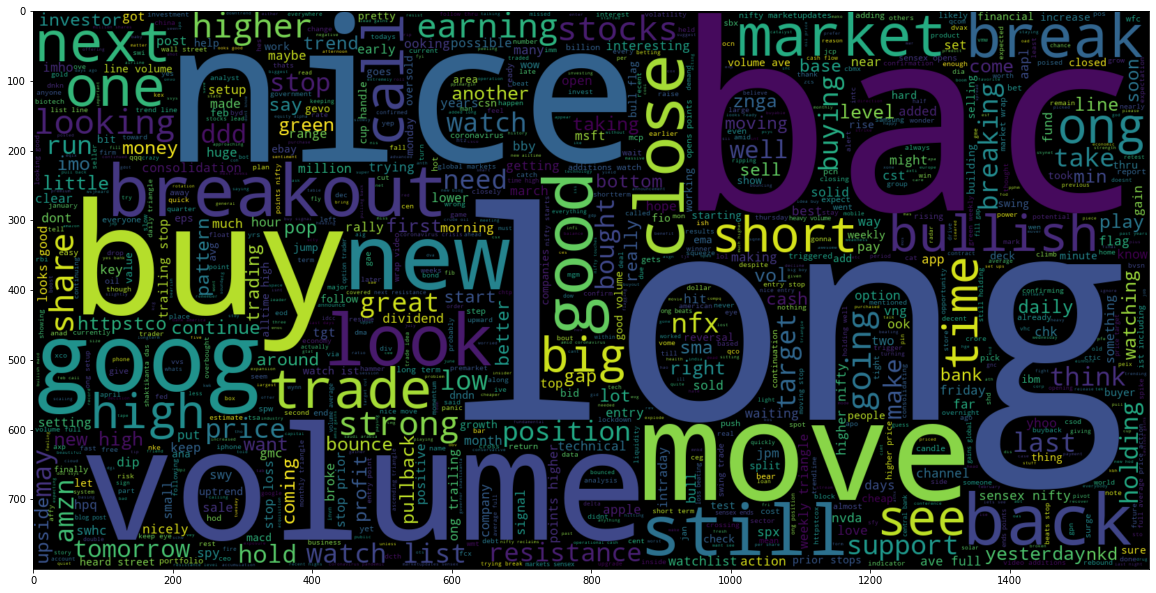

In [ ]:
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

 VISUALIZING CLEANED DATASETS

In [ ]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# word_tokenize is used to break up a string into words
print(stock_df['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(stock_df['Text Without Punc & Stopwords Joined'][0]))

kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [ ]:
# Obtaining the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = -1
for doc in stock_df['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 20


In [ ]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Text Without Punc & Stopwords Joined'] ]
tweets_length

[14,
 6,
 7,
 1,
 0,
 1,
 8,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 5,
 2,
 5,
 3,
 10,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 9,
 8,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 12,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 13,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 16,
 6,
 9,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 16,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 3,
 3,
 10,
 10,
 8,
 6,
 8,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 8,
 9,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 7,
 2,
 4,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 13,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 9,
 10,
 13,
 10,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,
 12,
 10

In [ ]:
# Plotting the distribution for the number of words in a text
fig = px.histogram(x = tweets_length, nbins = 50)
fig.show()

PREPARING THE DATA BY TOKENIZING AND PADDING

![alt text](https://drive.google.com/uc?id=13j8m-JOpK994CtukR1EShiY_hGGjkNx-)

In [ ]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


In [ ]:
# Obtaining the total words present in the dataset
list_of_words = []
for i in stock_df['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)



In [ ]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamcos',
 'arry',
 'haverty',
 'apple',
 'extremely',
 'chea

In [ ]:
# Obtaining the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9268

In [ ]:
# Splitting the data into test and train 
# Splitting the data into test and train 
X = stock_df['Text Without Punc & Stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
X_train.shape

(5211,)

In [ ]:
X_test.shape

(580,)

In [ ]:
X_train

4622    [phm, nice, ooking, cup, handle, pivot, breaks...
4529                                       [acad, taking]
4287                                    [buyer, scooping]
2942    [end, added, list, best, picks, trade, alerts,...
531                    [moving, pivot, bullish, tomorrow]
                              ...                        
311                  [kos, positive, nice, reversal, kos]
847                                [hpq, opens, tomorrow]
4609    [really, looked, like, trap, fri, open, trade,...
3683    [interesting, skynet, keep, price, flux, chann...
4644    [like, like, intc, sold, triple, pgh, one, ret...
Name: Text Without Punc & Stopwords, Length: 5211, dtype: object

In [ ]:
# Creating a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)


In [ ]:
train_sequences

[[960, 11, 291, 387, 388, 698, 204, 57, 2, 4],
 [1306, 136],
 [1114, 3640],
 [179, 128, 82, 233, 1115, 29, 1887, 1307, 1536],
 [140, 698, 39, 75],
 [136],
 [961, 561, 1537, 2465, 1888],
 [3641, 70, 146, 1116, 4],
 [1538, 153, 1889, 52, 699, 1539, 3642, 1308, 19, 517, 154],
 [9, 129, 160, 2, 1309, 140, 209, 343, 8, 106, 28],
 [7, 19, 80, 242, 430, 780, 700, 155, 17, 1540, 962],
 [1541, 165, 72, 104, 303],
 [56, 215, 344],
 [1542, 76, 3643, 226, 304, 3644, 63, 3645],
 [210, 861, 781, 171, 60, 69, 160, 45, 345, 55],
 [20, 2466, 2467, 518, 963, 1117, 782, 1118, 1543, 372, 52, 3646, 3647, 3648],
 [1310, 165, 26, 155, 13, 98, 701, 2468, 21],
 [462, 86, 3649],
 [116, 8, 601, 130, 519, 1311, 783, 520, 485],
 [2469, 131, 41, 1312, 1890, 1119, 644, 862, 1544, 3650],
 [3651, 31, 3652, 188, 30, 17, 57, 87],
 [2470, 83, 463],
 [863, 1545, 964, 107, 54, 1546, 431, 1313, 113, 146, 1547],
 [2471, 864, 81, 702, 1314],
 [56, 215, 71, 1891, 865, 216, 1120, 373, 1121],
 [1315, 3653, 2472, 784, 866, 3654, 

In [ ]:
test_sequences

[[379, 138, 364, 276, 19, 802, 362, 161],
 [7],
 [138, 431, 5897, 968, 2843, 651, 2813, 4719, 9, 2, 155],
 [9, 82, 64, 2, 350, 95],
 [534, 57],
 [4148, 153, 457, 67, 593],
 [1611, 395, 1309, 177, 2018, 202, 10, 15, 47],
 [1310, 96, 347, 21],
 [1, 13],
 [466, 19, 121, 39],
 [159, 8559, 836, 1458, 210, 309, 622, 1850],
 [9, 82, 2236, 2, 95, 209],
 [484, 56, 205, 1183, 175, 51, 73, 375],
 [251, 14, 15, 152, 1463, 483],
 [136],
 [23, 249, 50, 15, 27, 102, 53, 802, 23, 27, 314],
 [3003, 8, 3052, 1246, 728, 2892, 89, 583, 11, 79],
 [155, 1941, 636, 2978, 467, 12, 140, 1687],
 [7345, 1783, 19, 429, 397, 3397],
 [158, 117, 98, 60, 73, 2735, 51, 63],
 [717, 106],
 [24, 52, 619, 26, 569, 8492, 455, 91],
 [3720],
 [147, 148, 12],
 [9, 2010],
 [221, 108, 676, 112, 7332, 1430, 102, 823, 181, 32, 143],
 [48, 33, 25, 97],
 [285, 1, 1060],
 [2602, 26, 1321, 100, 1595, 4071, 224, 1340, 26],
 [291, 22],
 [359, 11, 269, 211, 32, 19, 191, 1, 912, 7238, 1005, 367, 1520, 2068, 6434],
 [219, 1052, 16, 1415, 

In [ ]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 4529    [acad, taking]
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [1306, 136]


In [ ]:
# Adding padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 29, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 29, truncating = 'post')

In [ ]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [960  11 291 387 388 698 204  57   2   4   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]
The padded encoding for document: 2  is: [1306  136    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 3  is: [1114 3640    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [ ]:
# Converting the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [ ]:
y_train_cat.shape

(5211, 2)

In [ ]:
y_test_cat.shape

(580, 2)

In [ ]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

UNDERSTANDING THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS AND LONG SHORT TERM MEMORY NETWORKS (LSTM)

![alt text](https://drive.google.com/uc?id=1Giaz7q1THBFTuNFpSyLBKnoUbbvWlNw3)

![alt text](https://drive.google.com/uc?id=1iDKpQqmGTNr3riuQOvXdiwfy9wlCU5st)

![alt text](https://drive.google.com/uc?id=1PxW6DBer4d1Q9_9OSaAQDTtqUdDGLdYa)

BUILDING A CUSTOM-BASED DEEP NEURAL NETWORK TO PERFORM SENTIMENT ANALYSIS

![alt text](https://drive.google.com/uc?id=1zpI1XHM1CSxLPjsW7QTahfs_f2stzKeQ)

In [ ]:
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 256))

# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         2372608   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               394240    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,799,873
Trainable params: 2,799,873
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Sequential Model
model = Sequential()

# Embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 512)         4745216   
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               787456    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 25)

Epoch 1/25
131/131 [==============================] - 28s 196ms/step - loss: 0.5864 - acc: 0.6799 - val_loss: 0.4645 - val_acc: 0.7910
Epoch 2/25
131/131 [==============================] - 25s 191ms/step - loss: 0.3057 - acc: 0.8772 - val_loss: 0.5495 - val_acc: 0.7718
Epoch 3/25
131/131 [==============================] - 25s 192ms/step - loss: 0.1606 - acc: 0.9412 - val_loss: 0.6049 - val_acc: 0.7747
Epoch 4/25
131/131 [==============================] - 25s 192ms/step - loss: 0.1048 - acc: 0.9633 - val_loss: 0.8070 - val_acc: 0.7526
Epoch 5/25
131/131 [==============================] - 25s 192ms/step - loss: 0.0727 - acc: 0.9726 - val_loss: 1.0447 - val_acc: 0.7613
Epoch 6/25
131/131 [==============================] - 25s 190ms/step - loss: 0.0591 - acc: 0.9777 - val_loss: 1.3389 - val_acc: 0.7555
Epoch 7/25
131/131 [==============================] - 25s 188ms/step - loss: 0.0572 - acc: 0.9801 - val_loss: 1.2810 - val_acc: 0.7402
Epoch 8/25
131/131 [==============================] - 2

 ASSESSING TRAINED MODEL PERFORMANCE

![alt text](https://drive.google.com/uc?id=1MZdb0g69XDC4JRATR9K6-2NAkrclGAXO)

In [ ]:
# Making prediction
pred = model.predict(padded_test)

In [ ]:

prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [ ]:
# list containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [ ]:
# accuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.6931034482758621

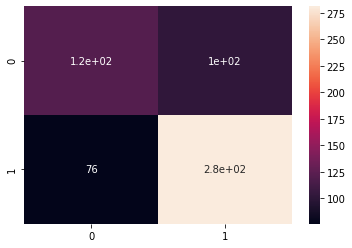

In [ ]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)

***END OF STOCK SENTIMENT ANALYSIS***